# **Introduction**

# **Importing libraries**

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import BernoulliNB 
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelBinarizer

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score, roc_curve, roc_auc_score

# **Introduction**

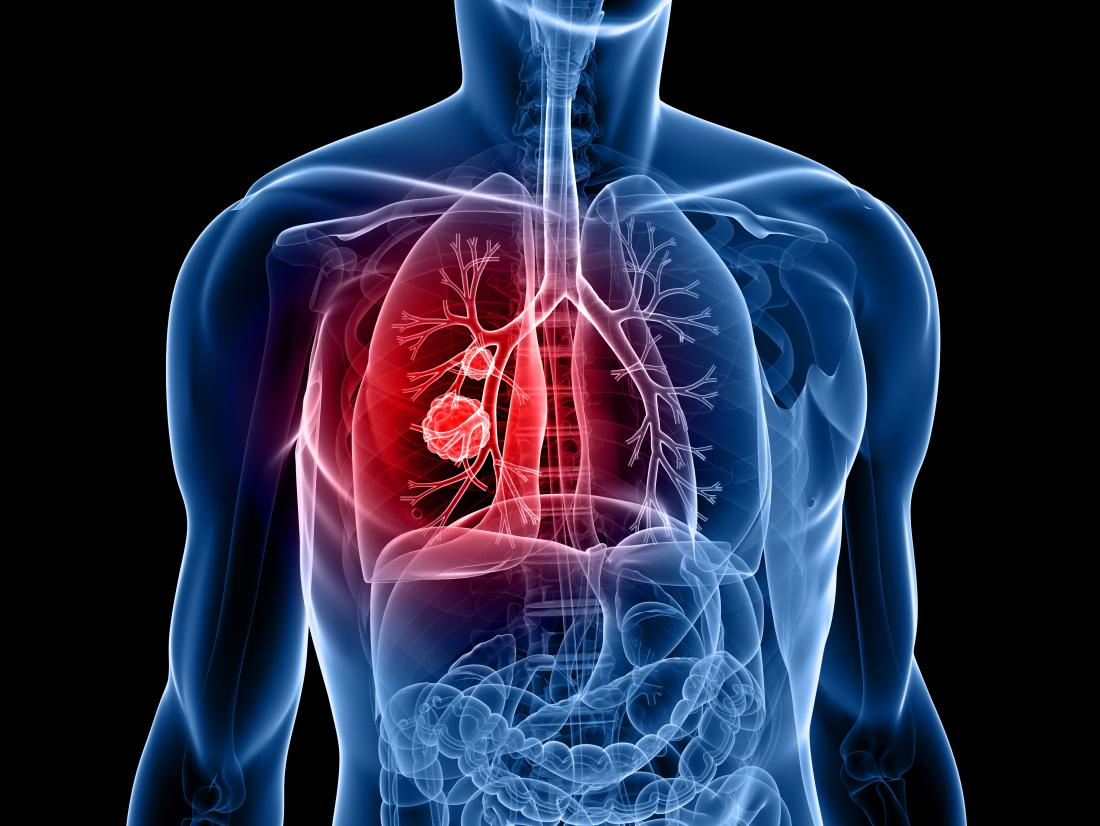

In [2]:
# Put objective of the project, mention target variable, 

Background: Cancer is a disease in which cells in the body grow out of control. When cancer starts in the lungs, it is called lung cancer.

Lung cancer begins in the lungs and may spread to lymph nodes or other organs in the body, such as the brain. Cancer from other organs also may spread to the lungs. When cancer cells spread from one organ to another, they are called metastases.

Lung cancers usually are grouped into two main types called small cell and non-small cell (including adenocarcinoma and squamous cell carcinoma). These types of lung cancer grow differently and are treated differently. Non-small cell lung cancer is more common than small cell lung cancer.


# **About the dataset**

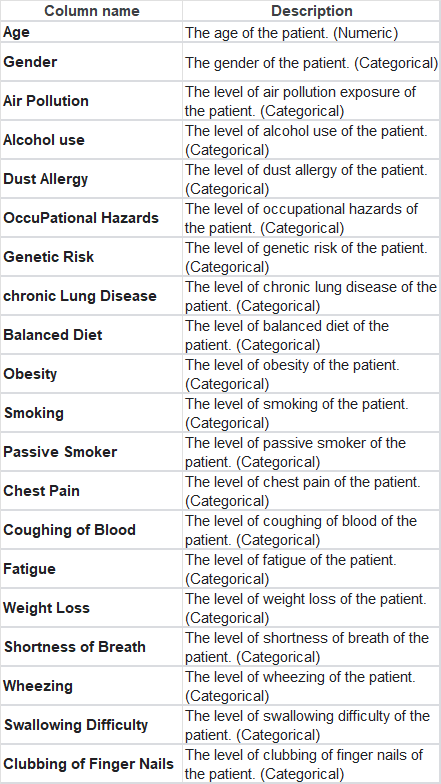

# **Reading the dataset**

In [3]:
dataset = pd.read_csv('/Users/abdihussein/Downloads/cancer patient data sets.csv', sep = ',')
dataset.head()

index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0            4                    2         2                      3   
1            3                    7         8                      6   
2            7                    9         2                      1   
3            2                    3         1                      4   
4            2                    4         1                      4   

   Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring   Level  
0                         1              2          3        4     Low  
1                         2              1          7        2  Medium  
2                         4              6          7        2    High  
3                         5              6          7        5    High  
4                         2              4          2        3    High  

[5 rows x 26 columns]

In [4]:
dataset.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [5]:
dataset = dataset.iloc[:, 2:]

In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

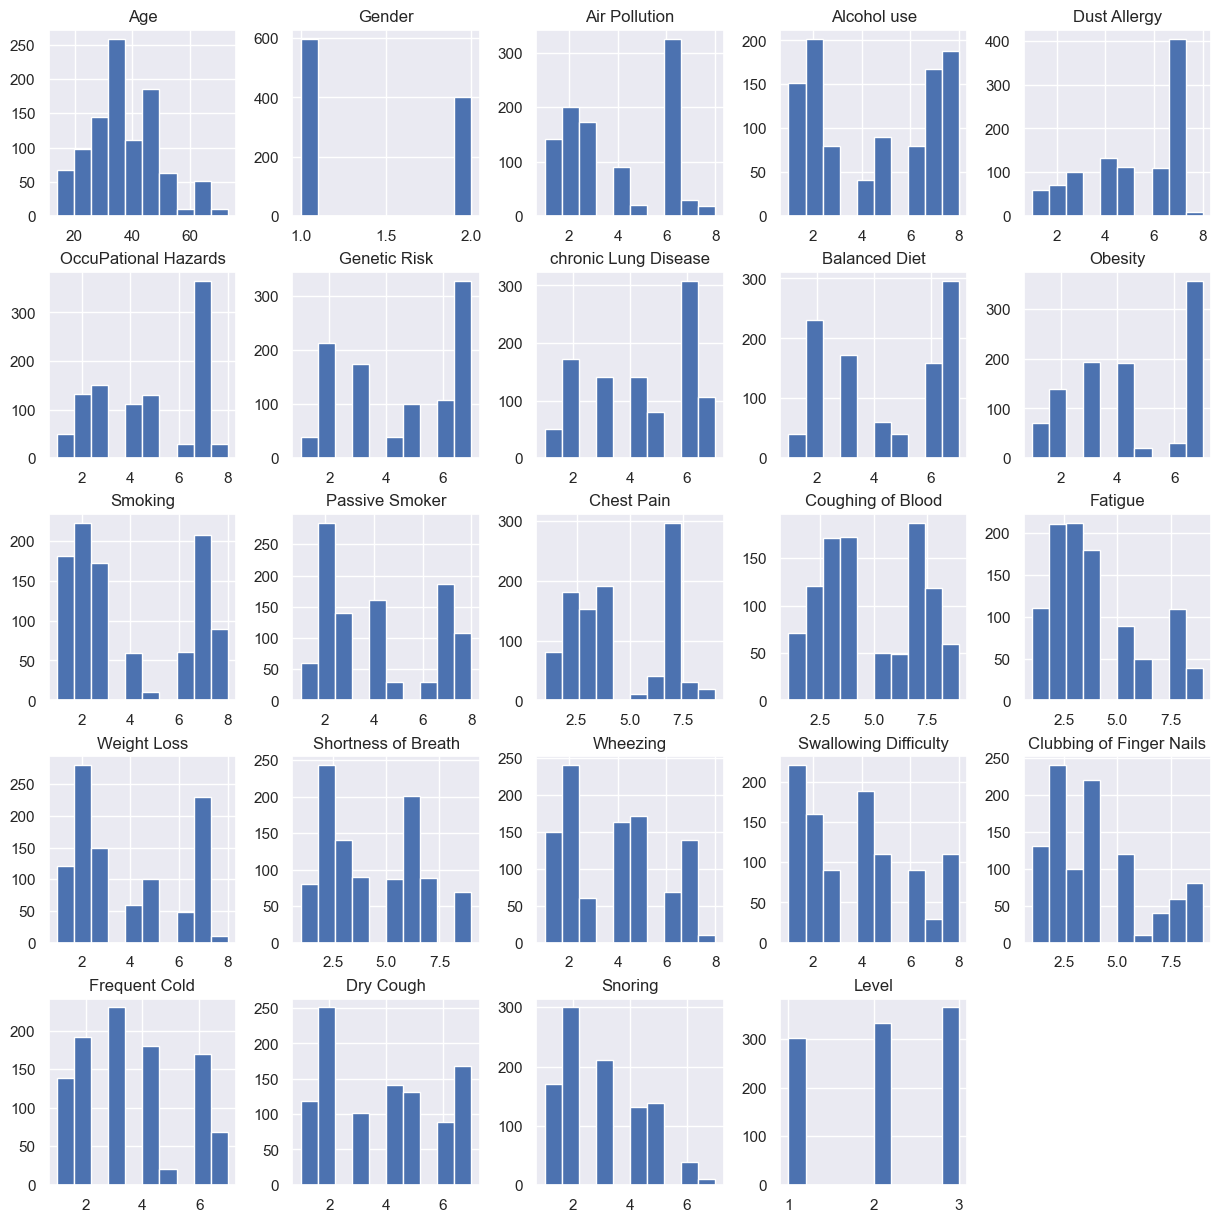

In [81]:

a=dataset.hist(figsize=(15,15))

# **Showing the informations**

In [83]:
fig = px.histogram(dataset, x = 'Age', color = 'Level', nbins = 10, title = 'Distribution of ages', text_auto = True)
fig.show()

fig = px.box(dataset, x = 'Age', y = 'Level')
fig.show()

In [8]:
def graph(x, y, title):
  fig = px.histogram(dataset, x = x, y = y, color = 'Level', barmode = 'group', 
                   title = title, text_auto = True)
  fig.show()

  fig = px.box(dataset, x = x, y = 'Level')
  fig.show()

graph('Alcohol use', 'Gender', 'Distribution of Alcohol use')

In [9]:
graph('Dust Allergy', 'Gender', 'Distribution of Dust Allergy')

In [10]:
graph('OccuPational Hazards', 'Gender', 'Distribution of OccuPational Hazards')

In [11]:
graph('Genetic Risk', 'Gender', 'Distribution of Genetic Risk')

In [12]:
graph('chronic Lung Disease', 'Gender', 'Distribution of Chronic Lung Disease')

In [13]:
graph('Balanced Diet', 'Gender', 'Distribution of Balanced Diet')

In [14]:
graph('Obesity', 'Gender', 'Distribution of Obesity')

In [15]:
graph('Smoking', 'Gender', 'Distribution of Smoking')

In [16]:
graph('Passive Smoker', 'Gender', 'Distribution of Passive Smoker')

In [17]:
graph('Chest Pain', 'Gender', 'Distribution of Chest Pain')

In [18]:
graph('Coughing of Blood', 'Gender', 'Distribution of Coughing of Blood')

In [19]:
graph('Fatigue', 'Gender', 'Distribution of Fatigue')

In [20]:
graph('Weight Loss', 'Gender', 'Distribution of Weight Loss')

In [21]:
graph('Shortness of Breath', 'Gender', 'Distribution of Shortness of Breath')

In [22]:
graph('Wheezing', 'Gender', 'Distribution of Wheezing')

In [23]:
graph('Swallowing Difficulty', 'Gender', 'Distribution of Swallowing Difficulty')

In [24]:
graph('Clubbing of Finger Nails', 'Gender', 'Distribution of Clubbing of Finger Nails')

In [25]:
graph('Frequent Cold', 'Gender', 'Distribution of Frequent Cold')

In [26]:
graph('Dry Cough', 'Gender', 'Distribution of Dry Cough')

In [27]:
graph('Snoring', 'Gender', 'Distribution of Snoring')

In [28]:
fig = px.histogram(dataset, x = 'Level', y = 'Gender', color = 'Gender', barmode = 'group', 
                   title = 'Distribution of Level', text_auto = True)
fig.show()

# **What the data shows for us?**

It's possible to understand that according the level of column is increasing, higher is the level of people risk. There are few examples where exist some outliers. Perhaps, the medium risk isn't so objective, because it's the average between high and low values, and it isn't such a clear category to define specifically.

In [29]:
dataset.describe()

Age       Gender  Air Pollution  Alcohol use  Dust Allergy  \
count  1000.000000  1000.000000      1000.0000  1000.000000   1000.000000   
mean     37.174000     1.402000         3.8400     4.563000      5.165000   
std      12.005493     0.490547         2.0304     2.620477      1.980833   
min      14.000000     1.000000         1.0000     1.000000      1.000000   
25%      27.750000     1.000000         2.0000     2.000000      4.000000   
50%      36.000000     1.000000         3.0000     5.000000      6.000000   
75%      45.000000     2.000000         6.0000     7.000000      7.000000   
max      73.000000     2.000000         8.0000     8.000000      8.000000   

       OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
count           1000.000000   1000.000000           1000.000000   
mean               4.840000      4.580000              4.380000   
std                2.107805      2.126999              1.848518   
min                1.000000      1.000000              1.000000   
25%                3.000000      2.000000              3.000000   
50%                5.000000      5.000000              4.000000   
75%                7.000000      7.000000              6.000000   
max                8.000000      7.000000              7.000000   

       Balanced Diet      Obesity  ...  Coughing of Blood      Fatigue  \
count    1000.000000  1000.000000  ...        1000.000000  1000.000000   
mean        4.491000     4.465000  ...           4.859000     3.856000   
std         2.135528     2.124921  ...           2.427965     2.244616   
min         1.000000     1.000000  ...           1.000000     1.000000   
25%         2.000000     3.000000  ...           3.000000     2.000000   
50%         4.000000     4.000000  ...           4.000000     3.000000   
75%         7.000000     7.000000  ...           7.000000     5.000000   
max         7.000000     7.000000  ...           9.000000     9.000000   

       Weight Loss  Shortness of Breath     Wheezing  Swallowing Difficulty  \
count  1000.000000          1000.000000  1000.000000            1000.000000   
mean      3.855000             4.240000     3.777000               3.746000   
std       2.206546             2.285087     2.041921               2.270383   
min       1.000000             1.000000     1.000000               1.000000   
25%       2.000000             2.000000     2.000000               2.000000   
50%       3.000000             4.000000     4.000000               4.000000   
75%       6.000000             6.000000     5.000000               5.000000   
max       8.000000             9.000000     8.000000               8.000000   

       Clubbing of Finger Nails  Frequent Cold    Dry Cough      Snoring  
count               1000.000000    1000.000000  1000.000000  1000.000000  
mean                   3.923000       3.536000     3.853000     2.926000  
std                    2.388048       1.832502     2.039007     1.474686  
min                    1.000000       1.000000     1.000000     1.000000  
25%                    2.000000       2.000000     2.000000     2.000000  
50%                    4.000000       3.000000     4.000000     3.000000  
75%                    5.000000       5.000000     6.000000     4.000000  
max                    9.000000       7.000000     7.000000     7.000000  

[8 rows x 23 columns]

In [30]:
dataset

Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0     33       1              2            4             5   
1     17       1              3            1             5   
2     35       1              4            5             6   
3     37       1              7            7             7   
4     46       1              6            8             7   
..   ...     ...            ...          ...           ...   
995   44       1              6            7             7   
996   37       2              6            8             7   
997   25       2              4            5             6   
998   18       2              6            8             7   
999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                       4             3                     2              2   
1                       3             4                     2              2   
2                       5             5                     4              6   
3                       7             6                     7              7   
4                       7             7                     6              7   
..                    ...           ...                   ...            ...   
995                     7             7                     6              7   
996                     7             7                     6              7   
997                     5             5                     4              6   
998                     7             7                     6              7   
999                     5             5                     4              6   

     Obesity  ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0          4  ...        3            4                    2         2   
1          2  ...        1            3                    7         8   
2          7  ...        8            7                    9         2   
3          7  ...        4            2                    3         1   
4          7  ...        3            2                    4         1   
..       ...  ...      ...          ...                  ...       ...   
995        7  ...        5            3                    2         7   
996        7  ...        9            6                    5         7   
997        7  ...        8            7                    9         2   
998        7  ...        3            2                    4         1   
999        7  ...        8            7                    9         2   

     Swallowing Difficulty  Clubbing of Finger Nails  Frequent Cold  \
0                        3                         1              2   
1                        6                         2              1   
2                        1                         4              6   
3                        4                         5              6   
4                        4                         2              4   
..                     ...                       ...            ...   
995                      8                         2              4   
996                      2                         4              3   
997                      1                         4              6   
998                      4                         2              4   
999                      1                         4              6   

     Dry Cough  Snoring   Level  
0            3        4     Low  
1            7        2  Medium  
2            7        2    High  
3            7        5    High  
4            2        3    High  
..         ...      ...     ...  
995          5        3    High  
996          1        4    High  
997          7        2    High  
998          2        3    High  
999          7        2    High  

[1000 rows x 24 columns]

# **Standarding the data**

In [31]:
dataset['Level'].replace(to_replace=["Low", "Medium", "High"], value = [1, 2, 3], inplace = True)

In [32]:
standard = StandardScaler()
dataset_standard = standard.fit_transform(dataset)

In [33]:
dataset_standard_2 = pd.DataFrame(data = dataset_standard, columns = dataset.keys())

Text(0.5, 1.0, 'Correlation Matriz')

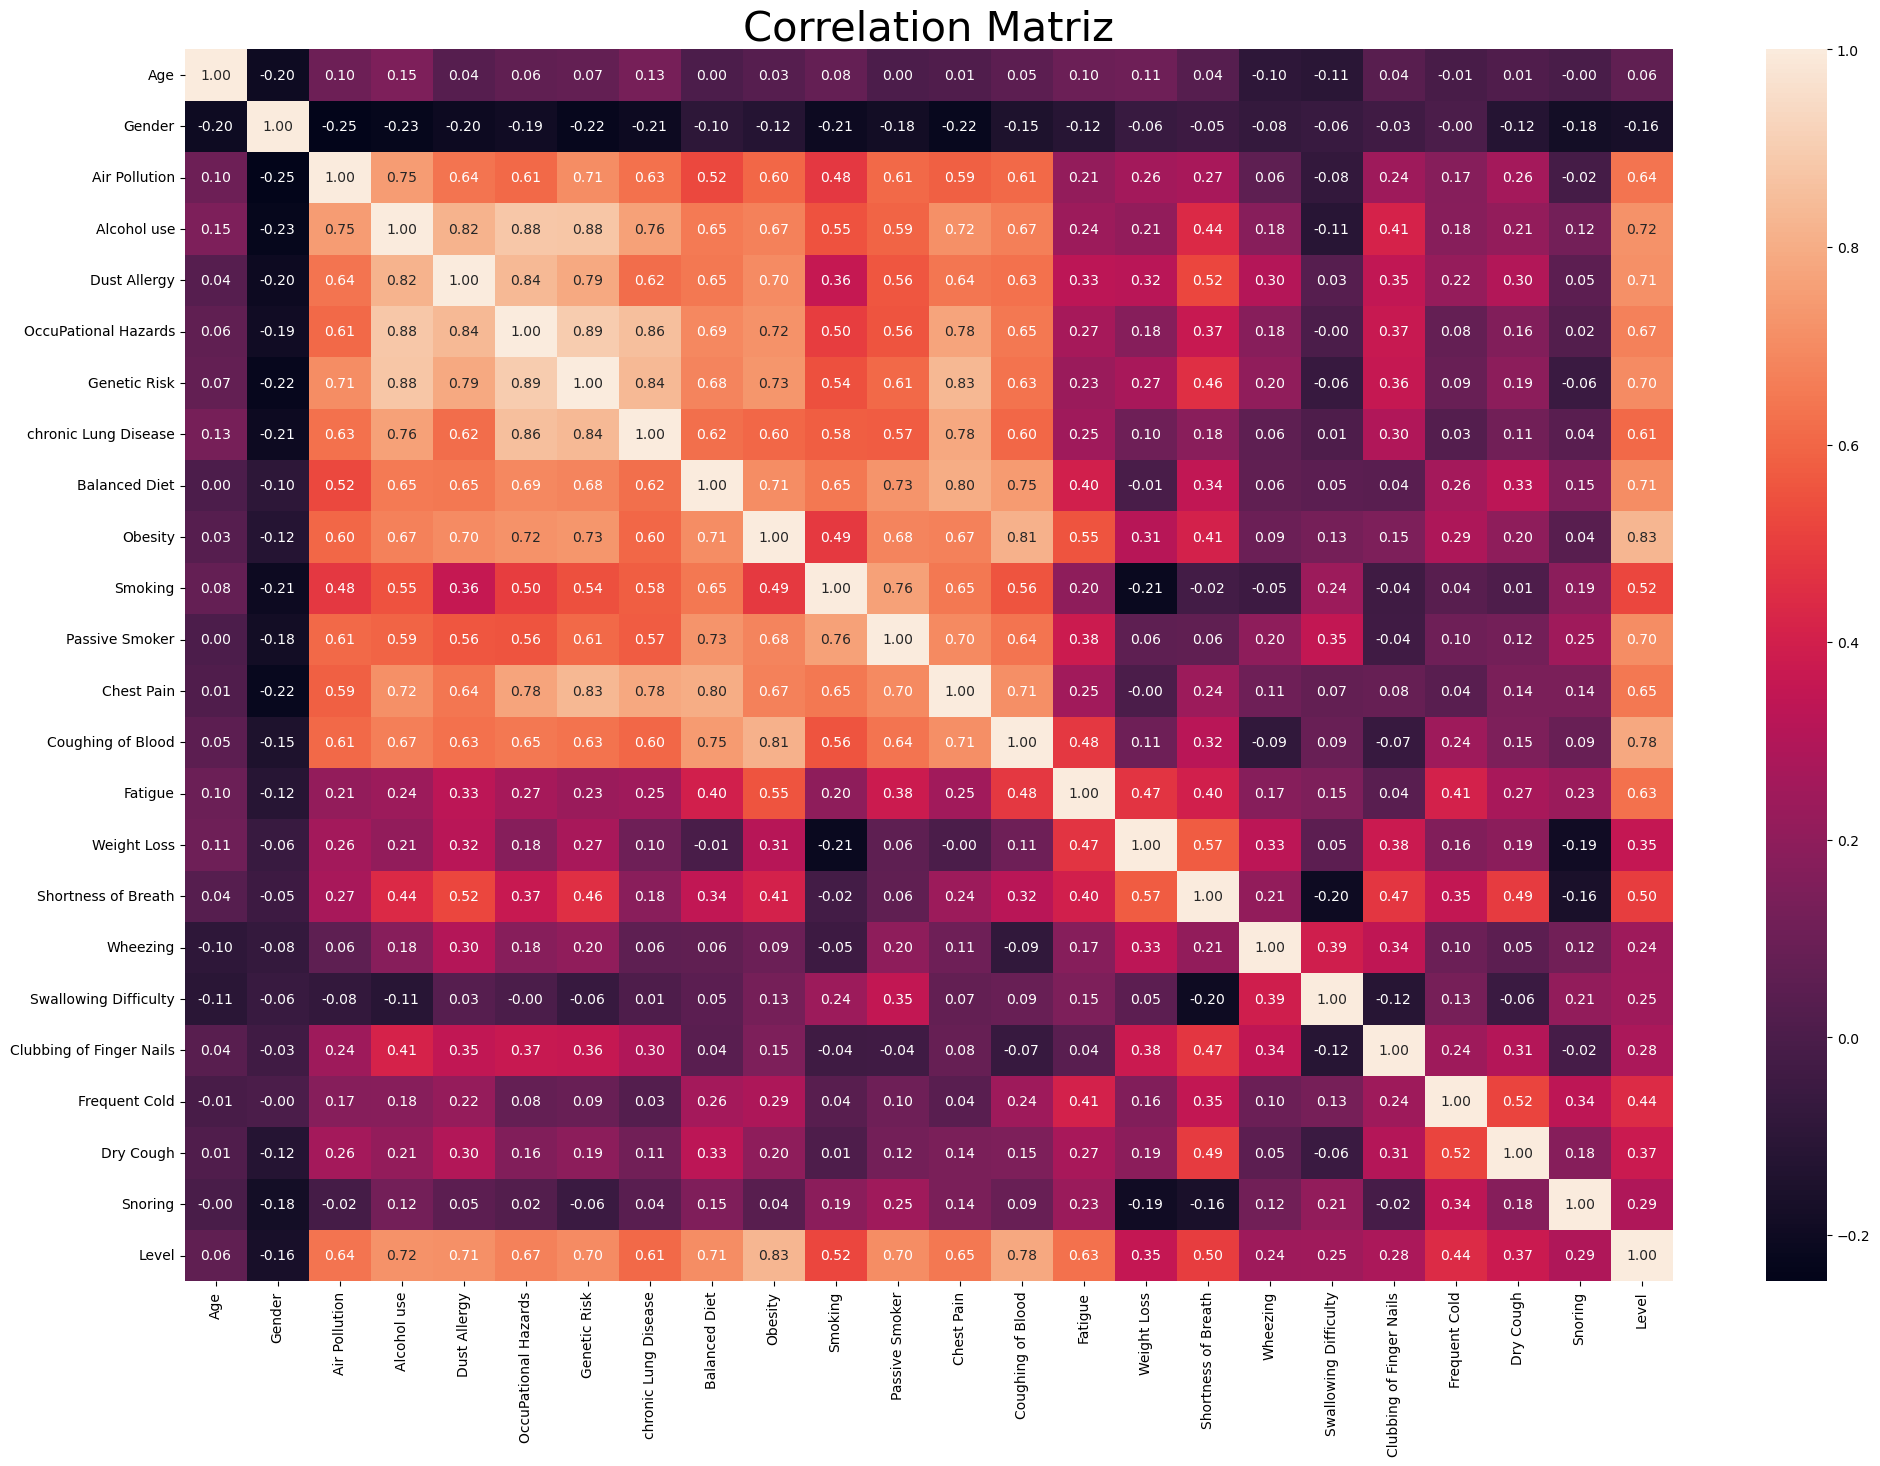

In [34]:
correlation = dataset_standard_2.corr()
graph = sns.heatmap(correlation, annot = True, fmt = '.2f')
graph.figure.set_size_inches(24, 16)
graph.set_title('Correlation Matriz', fontsize = 30)

# **Separating the data between train and test**

In [35]:
X = dataset_standard_2.iloc[:, :23].values
y = dataset.iloc[:, 23].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1234)

# **Running the models**

Accuracy: 0.82


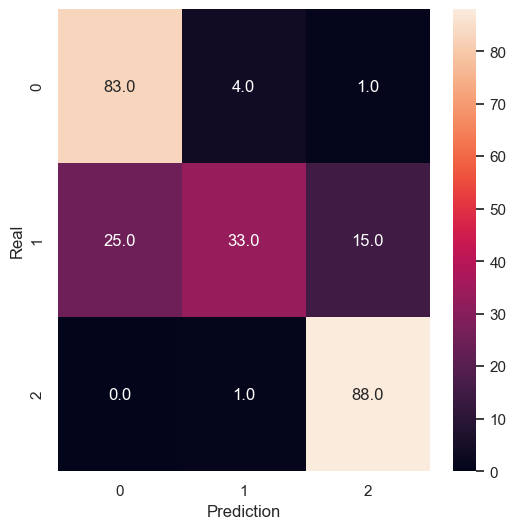

In [37]:
from sklearn.metrics import confusion_matrix

bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb_predict = bnb.predict(X_test)

accuracy_bnb = accuracy_score(y_test, bnb_predict)

confusion_matrix = confusion_matrix(y_test, bnb_predict)
plt.figure(figsize = (6,6))
sns.set(font_scale = 1)
sns.heatmap(confusion_matrix, annot = True, fmt = '.1f').set(xlabel = 'Prediction', ylabel = 'Real')

print('Accuracy: {:.2f}'.format(accuracy_bnb))

Accuracy: 1.00


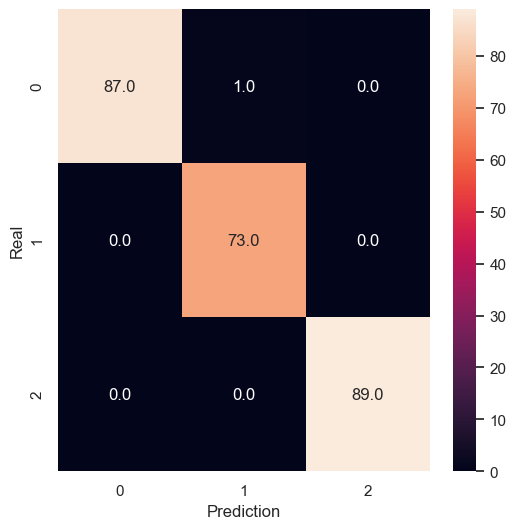

In [38]:
from sklearn.metrics import confusion_matrix

svc = LinearSVC()
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)

accuracy_svc = accuracy_score(y_test, svc_predict)

confusion_matrix = confusion_matrix(y_test, svc_predict)
plt.figure(figsize = (6,6))
sns.set(font_scale = 1)
sns.heatmap(confusion_matrix, annot = True, fmt = '.1f').set(xlabel = 'Prediction', ylabel = 'Real')

print('Accuracy: {:.2f}'.format(accuracy_svc))

In [87]:
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(metric='euclidean')
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, knn_predict)

confusion_matrix = confusion_matrix(y_test, knn_predict)
plt.figure(figsize = (6,6))
sns.set(font_scale = 1)
sns.heatmap(confusion_matrix, annot = True, fmt = '.1f').set(xlabel = 'Prediction', ylabel = 'Real')

print('Accuracy: {:.2f}'.format(accuracy_knn))

/Users/abdihussein/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

Accuracy: 1.00


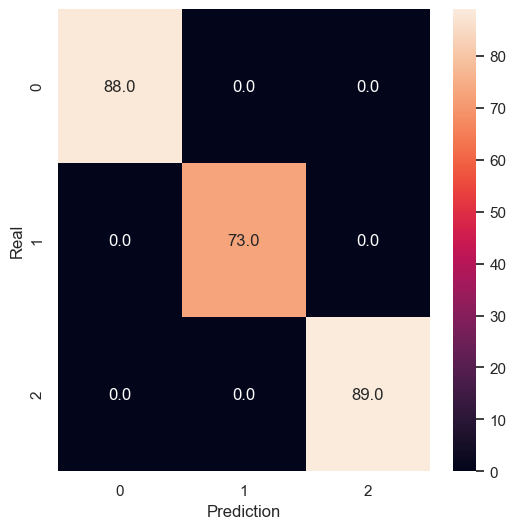

In [40]:
from sklearn.metrics import confusion_matrix

dtc = DecisionTreeClassifier(criterion='entropy', random_state = 1234)
dtc.fit(X_train, y_train)
dtc_predict = dtc.predict(X_test)

accuracy_dtc = accuracy_score(y_test, dtc_predict)

confusion_matrix = confusion_matrix(y_test, dtc_predict)
plt.figure(figsize = (6,6))
sns.set(font_scale = 1)
sns.heatmap(confusion_matrix, annot = True, fmt = '.1f').set(xlabel = 'Prediction', ylabel = 'Real')

print('Accuracy: {:.2f}'.format(accuracy_dtc))

Accuracy: 1.00


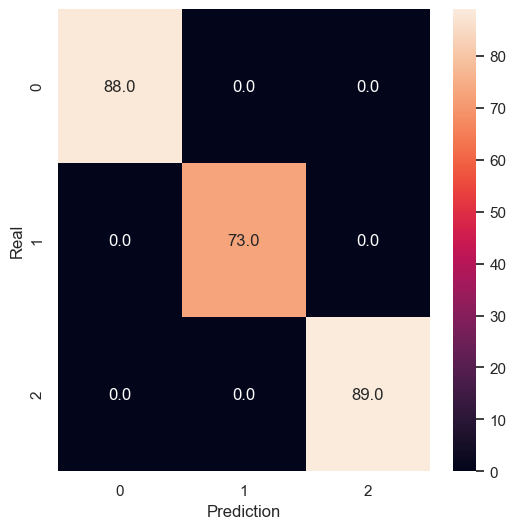

In [41]:
from sklearn.metrics import confusion_matrix

rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)

accuracy_rfc = accuracy_score(y_test, rfc_predict)

confusion_matrix = confusion_matrix(y_test, rfc_predict)
plt.figure(figsize = (6,6))
sns.set(font_scale = 1)
sns.heatmap(confusion_matrix, annot = True, fmt = '.1f').set(xlabel = 'Prediction', ylabel = 'Real')

print('Accuracy: {:.2f}'.format(accuracy_rfc))

# **Calculating the ROC curve of each model**

In [52]:
lb = LabelBinarizer()
y_test = lb.fit_transform(y_test)
bnb_predict = lb.fit_transform(bnb_predict)
svc_predict = lb.fit_transform(svc_predict)
knn_predict = lb.fit_transform(knn_predict)
dtc_predict = lb.fit_transform(dtc_predict)
rfc_predict = lb.fit_transform(rfc_predict)

In [53]:
bnb_auc = [0] * 3
bnb_fpr = [0] * 3
bnb_tpr = [0] * 3
bnb_thresholds = [0] * 3

svc_auc = [0] * 3
svc_fpr = [0] * 3
svc_tpr = [0] * 3
svc_thresholds = [0] * 3

knn_auc = [0] * 3
knn_fpr = [0] * 3
knn_tpr = [0] * 3
knn_thresholds = [0] * 3

dtc_auc = [0] * 3
dtc_fpr = [0] * 3
dtc_tpr = [0] * 3
dtc_thresholds = [0] * 3

rfc_auc = [0] * 3
rfc_fpr = [0] * 3
rfc_tpr = [0] * 3
rfc_thresholds = [0] * 3

In [54]:
for i in range(len(bnb_auc)):
  bnb_auc[i] = roc_auc_score(y_test[:, i], bnb_predict[:, i], multi_class = 'ovr', average = 'macro')
  svc_auc[i] = roc_auc_score(y_test[:, i], svc_predict[:, i], multi_class = 'ovr', average = 'macro')
  knn_auc[i] = roc_auc_score(y_test[:, i], knn_predict[:, i], multi_class = 'ovr', average = 'macro')
  dtc_auc[i] = roc_auc_score(y_test[:, i], dtc_predict[:, i], multi_class = 'ovr', average = 'macro')
  rfc_auc[i] = roc_auc_score(y_test[:, i], rfc_predict[:, i], multi_class = 'ovr', average = 'macro')
  bnb_fpr[i], bnb_tpr[i], bnb_thresholds[i] = roc_curve(y_test[:, i], bnb_predict[:, i])
  svc_fpr[i], svc_tpr[i], svc_thresholds[i] = roc_curve(y_test[:, i], svc_predict[:, i])
  knn_fpr[i], knn_tpr[i], knn_thresholds[i] = roc_curve(y_test[:, i], knn_predict[:, i])
  dtc_fpr[i], dtc_tpr[i], dtc_thresholds[i] = roc_curve(y_test[:, i], dtc_predict[:, i])
  rfc_fpr[i], rfc_tpr[i], rfc_thresholds[i] = roc_curve(y_test[:, i], rfc_predict[:, i])

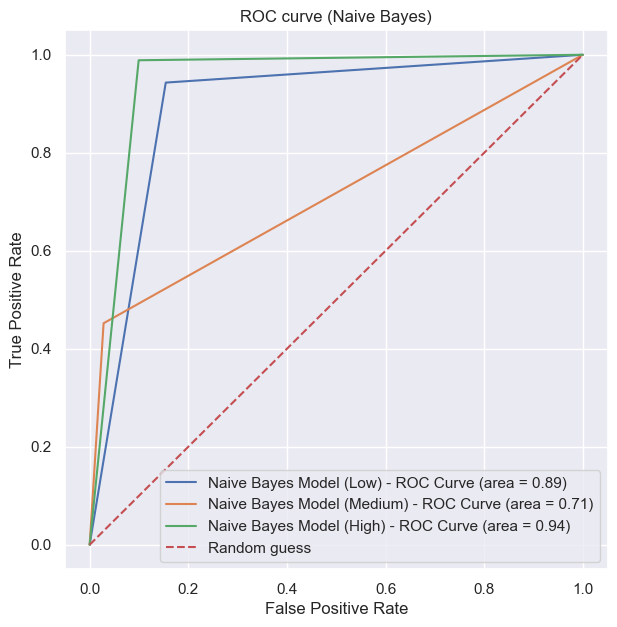

In [45]:
plt.figure(figsize = (7, 7))
plt.plot(bnb_fpr[0], bnb_tpr[0], label = 'Naive Bayes Model (Low) - ROC Curve (area = %.2f)' %bnb_auc[0])
plt.plot(bnb_fpr[1], bnb_tpr[1], label = 'Naive Bayes Model (Medium) - ROC Curve (area = %.2f)' %bnb_auc[1])
plt.plot(bnb_fpr[2], bnb_tpr[2], label = 'Naive Bayes Model (High) - ROC Curve (area = %.2f)' %bnb_auc[2])
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'r', label = 'Random guess')
plt.title('ROC curve (Naive Bayes)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.show()

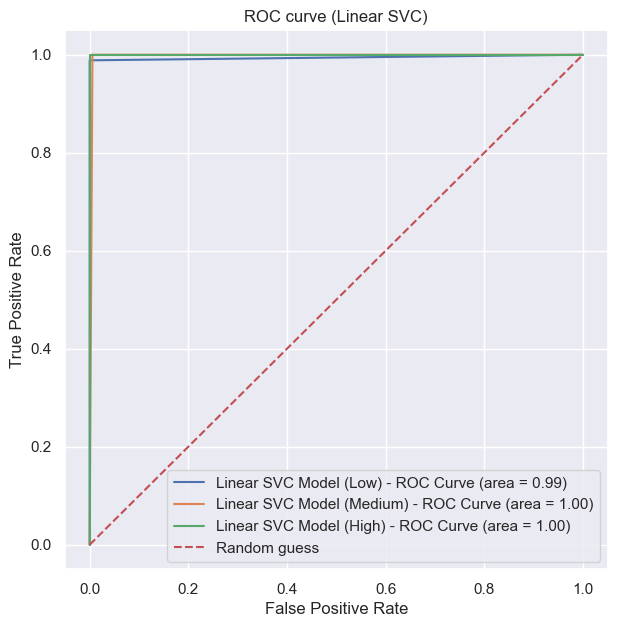

In [46]:
plt.figure(figsize = (7, 7))
plt.plot(svc_fpr[0], svc_tpr[0], label = 'Linear SVC Model (Low) - ROC Curve (area = %.2f)' %svc_auc[0])
plt.plot(svc_fpr[1], svc_tpr[1], label = 'Linear SVC Model (Medium) - ROC Curve (area = %.2f)' %svc_auc[1])
plt.plot(svc_fpr[2], svc_tpr[2], label = 'Linear SVC Model (High) - ROC Curve (area = %.2f)' %svc_auc[2])
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'r', label = 'Random guess')
plt.title('ROC curve (Linear SVC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.show()

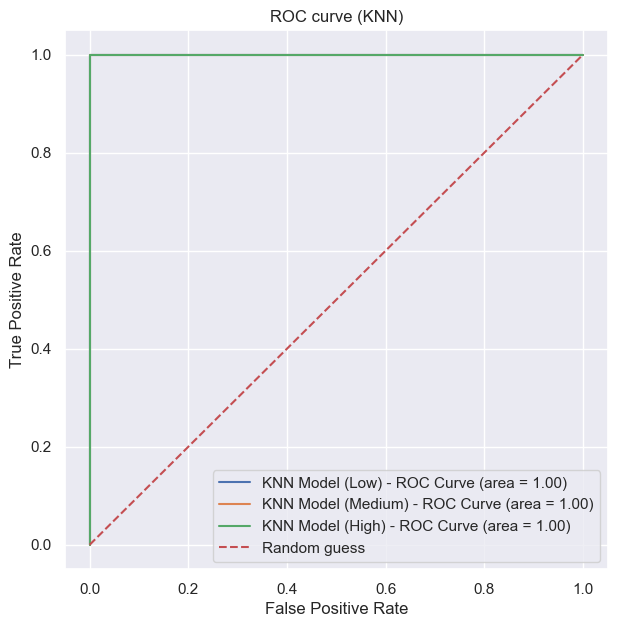

In [47]:
plt.figure(figsize = (7, 7))
plt.plot(knn_fpr[0], knn_tpr[0], label = 'KNN Model (Low) - ROC Curve (area = %.2f)' %knn_auc[0])
plt.plot(knn_fpr[1], knn_tpr[1], label = 'KNN Model (Medium) - ROC Curve (area = %.2f)' %knn_auc[1])
plt.plot(knn_fpr[2], knn_tpr[2], label = 'KNN Model (High) - ROC Curve (area = %.2f)' %knn_auc[2])
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'r', label = 'Random guess')
plt.title('ROC curve (KNN)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.show()

In [48]:
# Calculate the accuracy for each model
# Try hyper parameter 

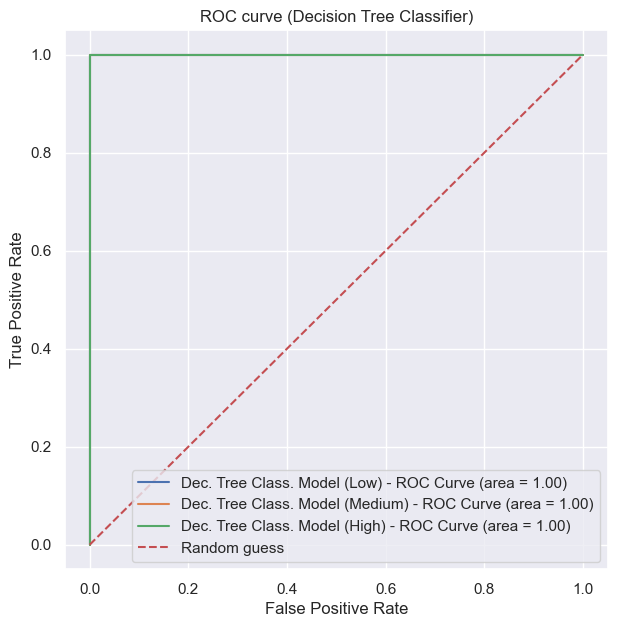

In [49]:
plt.figure(figsize = (7, 7))
plt.plot(dtc_fpr[0], dtc_tpr[0], label = 'Dec. Tree Class. Model (Low) - ROC Curve (area = %.2f)' %dtc_auc[0])
plt.plot(dtc_fpr[1], dtc_tpr[1], label = 'Dec. Tree Class. Model (Medium) - ROC Curve (area = %.2f)' %dtc_auc[1])
plt.plot(dtc_fpr[2], dtc_tpr[2], label = 'Dec. Tree Class. Model (High) - ROC Curve (area = %.2f)' %dtc_auc[2])
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'r', label = 'Random guess')
plt.title('ROC curve (Decision Tree Classifier)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.show()

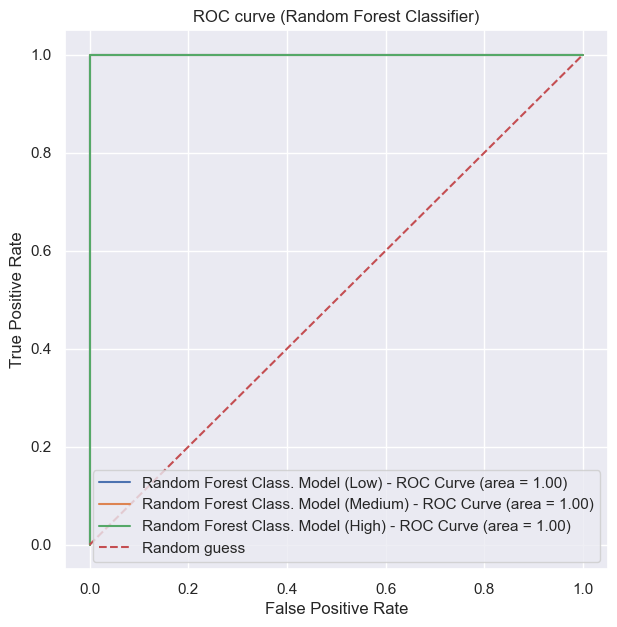

In [50]:
plt.figure(figsize = (7, 7))
plt.plot(rfc_fpr[0], rfc_tpr[0], label = 'Random Forest Class. Model (Low) - ROC Curve (area = %.2f)' %rfc_auc[0])
plt.plot(rfc_fpr[1], rfc_tpr[1], label = 'Random Forest Class. Model (Medium) - ROC Curve (area = %.2f)' %rfc_auc[1])
plt.plot(rfc_fpr[2], rfc_tpr[2], label = 'Random Forest Class. Model (High) - ROC Curve (area = %.2f)' %rfc_auc[2])
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'r', label = 'Random guess')
plt.title('ROC curve (Random Forest Classifier)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.show()

In [51]:
predictions = pd.DataFrame(zip(algs,acc), columns= ['Model', 'Accuracy'])
predictions = predictions.sort_values(by = 'Accuracy')
plt.figure(figsize=(10,10))
ax = sns.barplot(x='Accuracy', y= 'Model', data=predictions, palette='Greens')
plt.title("Prediction Accuracy of Different Models", size=14)

NameError: name 'algs' is not defined

# **Conclusion**

Except the Naive Bayes, the rest of models have satisfied number of accuracy. However, the test data was small (250) to be sure that these models will be right every time when it insert new informations to predict. It'll be necessary a bigger dataset to train more and to analysis if the accuracy'll be the same or it will be decrease.

In [86]:
X = dataset.drop(columns=['Level'])
y = LabelEncoder().fit_transform(cancer['Level'])
y = y.reshape(-1, 1)

NameError: name 'LabelEncoder' is not defined